# Car Price Prediction Tubes Statistika Industri

## Load Data

### Connect to google drive and mount it to collab (Make sure dataset for car prediction is there)

place your dataset on /content/drive/MyDive/dataset folder

In [1025]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Needed Library

In [1026]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import seaborn as sns
import missingno as msno
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

### Load Dataset

In [1027]:
dataset_location = "/content/drive/MyDrive/dataset/cardekho.csv"
loaded_data = pd.read_csv(dataset_location)
loaded_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


## Data Description / Condition for Understanding

### Show Data Information

In [1028]:
loaded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


Pada Kolom diatas, terdapat total 12 kolom mulai dari nama mobil, hingga seats yang dimiliki oleh mobil. Adapun penjelasan masing-masing kolom adalah sebagai berikut:

1.   name << Merupakan nama mobil
2.   year << Tahun pembuatan mobil
3. selling_price << Harga jual mobil dalam rupee (indian currency)
4. km_driven << Total kilometer yang ditempuh mobil
5. fuel << Jenis bahan bakar yang digunakan
6. seller_type << Tipe seller, apakah perorangan, dealer, atau yang lainnya
6. transmission << Jenis transmisi mobil, apakah manual atau automatic
7. owner << Jumlah berpindahnya kepemilikan mobil (first owner, second owner)
8. mileage << Efisiensi bahan bakar mobil / berapa banyak liter yang mobil habiskan untuk menempuh jarak dalam satuan kilometer
9. engine << spesifikasi tentang kapasitas mesin mobil untuk mengubah bahan bakar menjadi tenaga penggerak mobil dalam satuan CC
10. max_power << Kecepatan maksimal mobil dalam satuan KM
11. seats << Jumlah seats / kursi yang ada pada mobil

### Check missing value on data for later cleansing

In [1029]:
loaded_data.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


### Check Duplicate

In [1030]:
loaded_data[loaded_data.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
291,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.90,1197.0,82,5.0
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,85.8,5.0
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.60,1999.0,177,5.0
371,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37,2487.0,214.56,5.0
372,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33,1999.0,177,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37,1461.0,108.45,5.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09,1248.0,88.5,5.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [1031]:
loaded_data.duplicated().sum()

1202

### Show data statistics

In [1032]:
loaded_data.describe().astype(int)

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128,8128,8128,7907,7907,7907
mean,2013,638271,69819,19,1458,5
std,4,806253,56550,4,503,0
min,1983,29999,1,0,624,2
25%,2011,254999,35000,16,1197,5
50%,2015,450000,60000,19,1248,5
75%,2017,675000,98000,22,1582,5
max,2020,10000000,2360457,42,3604,14


In [1033]:
loaded_data.describe(include='object')

,name,fuel,seller_type,transmission,owner,max_power
count,8128,8128,8128,8128,8128,7913
unique,2058,4,3,2,5,320
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,74
freq,129,4402,6766,7078,5289,377


## Data Visualization

### Univariate analysis

#### Mengubah nama kolom agar memudahkan proses pengolahan dan visualisasi data

In [1034]:
loaded_data = loaded_data.rename(columns={ "mileage(km/ltr/kg)": "fuel_eficiency" })
loaded_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [1035]:
def plot_univariate_data(data, x_label="", y_label="", kind="bar", is_save=False):
  data.value_counts().plot(kind=kind)
  plt.xlabel(x_label if x_label != "" else data.name)
  plt.ylabel(y_label if y_label != "" else "Quantity")
  if(is_save):
    plt.savefig(f"{x_label}.png")
  plt.show()


In [1036]:
def plot_univariate_data_in_percent(data):
  data.value_counts(normalize=True).plot(kind="bar")
  plt.xlabel(data.name)
  plt.ylabel("Percentage")
  plt.show()

#### Plot total tahun pembuatan masing-masing mobil

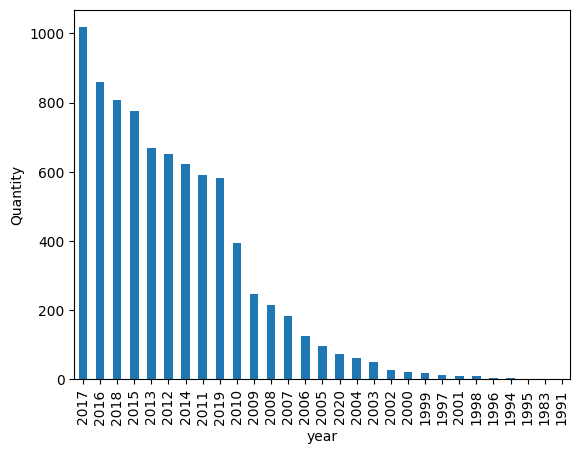

In [1037]:
# plot_univariate_data(loaded_data["year"], "Tahun Pembuatan", "Jumlah")
plot_univariate_data(loaded_data["year"])

In [1038]:
print(loaded_data["year"].min(), loaded_data["year"].max())

1983 2020


#### Plot Jenis bahan bakar yang digunakan mobil

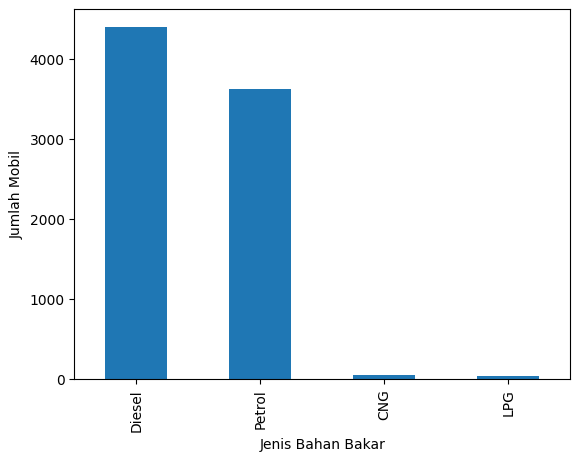

In [1039]:
plot_univariate_data(loaded_data["fuel"], "Jenis Bahan Bakar", "Jumlah Mobil")

#### Plot Jumlah Seats pada mobil

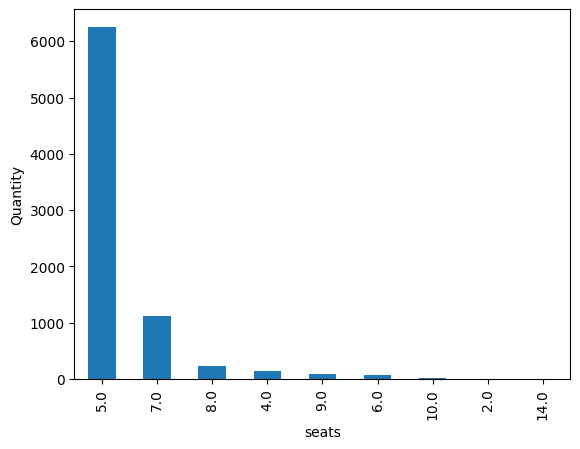

In [1040]:
plot_univariate_data(loaded_data["seats"])

#### Plot jujmlah total mobil berdasarkan tipe seller

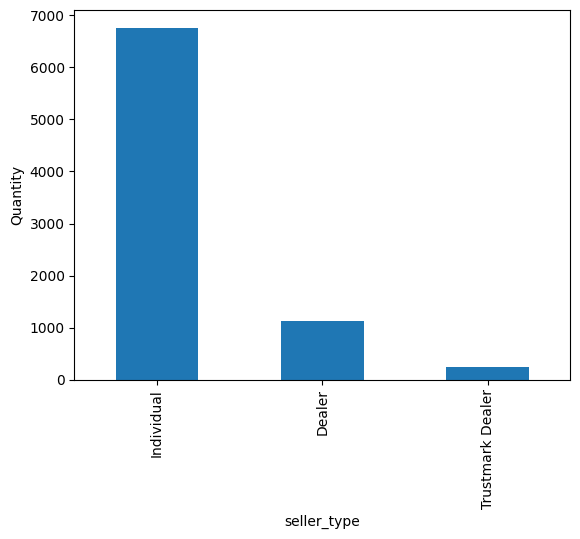

In [1041]:
plot_univariate_data(loaded_data["seller_type"])

#### Plot jumlah perpindahan kepemilikan mobil

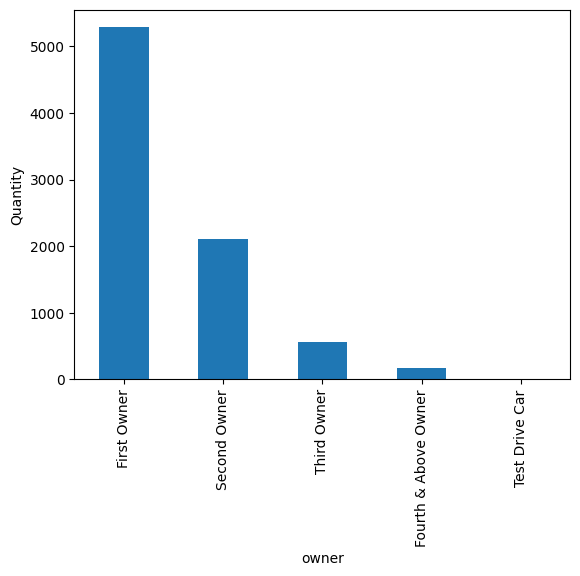

In [1042]:
plot_univariate_data(loaded_data["owner"])

#### Plot jenis transimisi yang digunakan oleh mobil

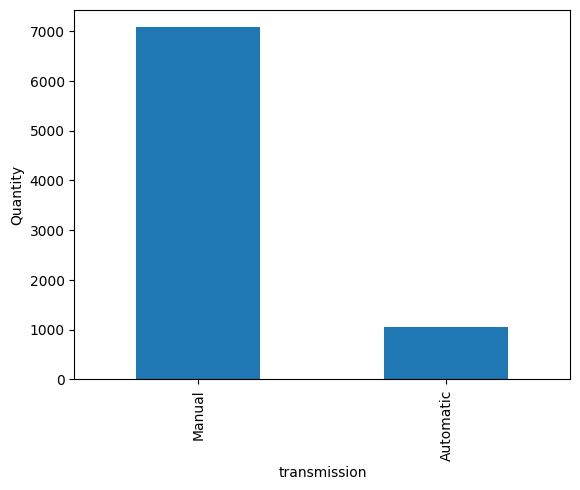

In [1043]:
plot_univariate_data(loaded_data["transmission"])

In [1044]:
loaded_data.describe().astype(int)

,year,selling_price,km_driven,fuel_eficiency,engine,seats
count,8128,8128,8128,7907,7907,7907
mean,2013,638271,69819,19,1458,5
std,4,806253,56550,4,503,0
min,1983,29999,1,0,624,2
25%,2011,254999,35000,16,1197,5
50%,2015,450000,60000,19,1248,5
75%,2017,675000,98000,22,1582,5
max,2020,10000000,2360457,42,3604,14


#### Plot data harga rata-rata per tahun

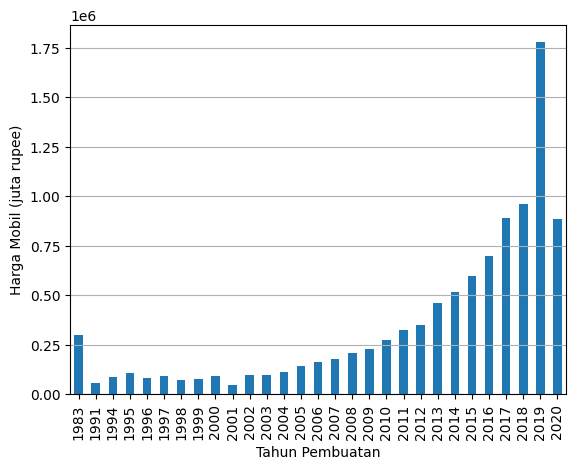

In [1045]:
data_groupby_selling_price_mean = loaded_data.groupby("year")["selling_price"].mean()
# plt.scatter(data_groupby_selling_price_mean.index, data_groupby_selling_price_mean)
data_groupby_selling_price_mean.plot(kind="bar")
plt.xlabel("Tahun Pembuatan")
plt.ylabel("Harga Mobil (juta rupee)")
plt.grid(axis="y")
plt.show()

Dari grafik di atas, terlihat bahwa harga rata-rata tiap tahun meningkat seiring berjalannya waktu.

#### Plot harga terendah dan tertinggi masing-masing tahun

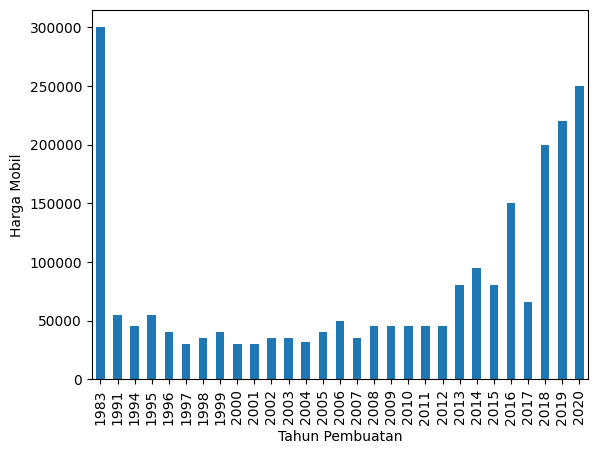

In [1046]:
min_data_per_year = loaded_data.groupby("year")["selling_price"].min()

# plt.scatter(min_data_per_year.index, min_data_per_year)
min_data_per_year.plot(kind="bar")
plt.xlabel("Tahun Pembuatan")
plt.ylabel("Harga Mobil")
plt.show()

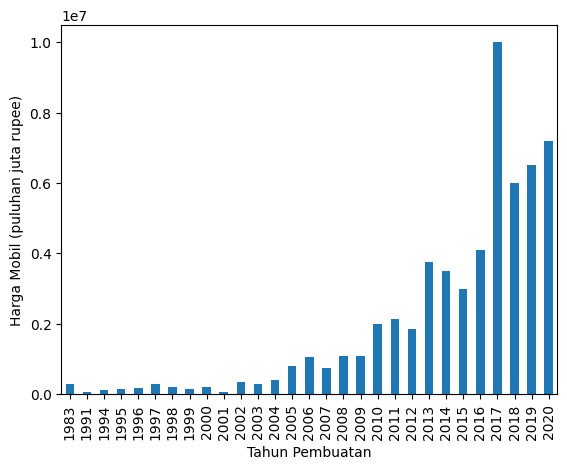

In [1047]:
max_data_per_year = loaded_data.groupby("year")["selling_price"].max()
max_data_per_year.plot(kind="bar")
plt.xlabel("Tahun Pembuatan")
plt.ylabel("Harga Mobil (puluhan juta rupee)")
plt.show()

plt.show()

Dari dua grafik di atas terlihat bahwa harga terendah mobil terletak di tahun 1997, sedangkan harga tertinggi mobil ada pada tahun 2017 dengan nilai 1 x 10e7 / 10.000.000 rupee

#### Plot harga jual mobil berdasarkan fuel

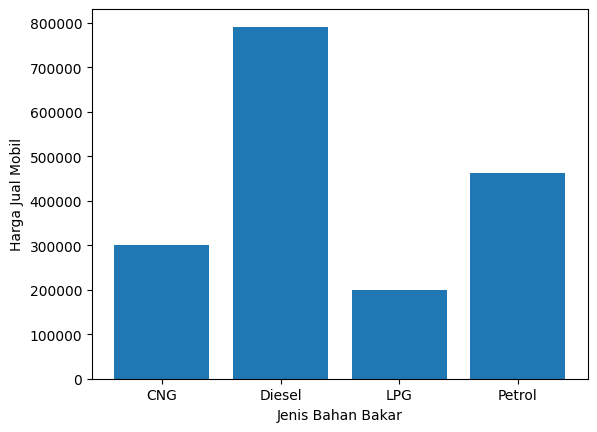

In [1048]:
fuel_mean_data = loaded_data.groupby("fuel")["selling_price"].mean()
plt.bar(fuel_mean_data.index, fuel_mean_data)
plt.xlabel("Jenis Bahan Bakar")
plt.ylabel("Harga Jual Mobil")
plt.show()

Dari data tersebut terlihat bahwa jenis mobil yang menggunakan bahan bakar diesel cenderung memiliki harga yang lebih tinggi dibanding dengan mobil yang menggunakan jenis bahan bakar lainnya. Hal ini dikarenakan mobil pada dataset ini mayoritas menggunakan jenis bahan bakar diesel dan petrol

#### Plot rata-rata efisiensi bahan bakar berdasarkan transmisi

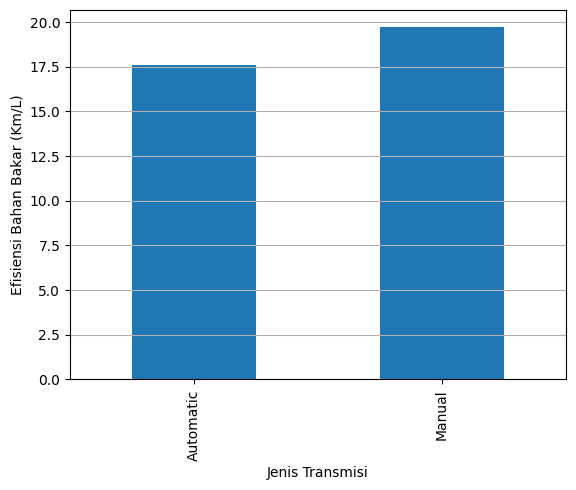

In [1049]:
loaded_data.groupby("transmission")["fuel_eficiency"].mean().plot(kind="bar")
plt.grid(axis="y")
plt.xlabel("Jenis Transmisi")
plt.ylabel("Efisiensi Bahan Bakar (Km/L)")
plt.show()

Pada grafik tersebut terlihat bahwa jenis bahan bakar manual lebih efisien daripada jenis transmisi automatic. Hal ini cukup kontradiksi mengingat mobil automatic biasanya lebih efisien dibanding manual. Hal ini disebabkan data yang ada tidak balance, sehingga menyebabkan bias data yang menunjukkan bahwa mobil manual lebih efisien daripada mobil matic

#### Proporsi pemilik pertama untuk mobil dengan transmisi otomatis

owner         First Owner  Fourth & Above Owner  Second Owner  Test Drive Car  \
transmission                                                                    
Automatic             889                     6           129               4   
Manual               4400                   168          1976               1   

owner         Third Owner  
transmission               
Automatic              22  
Manual                533  


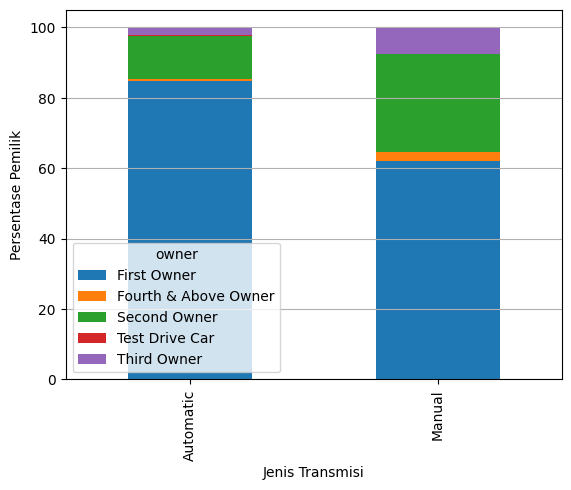

In [1050]:
owner_distribution = loaded_data.groupby(["transmission", "owner"])["name"].count().unstack()
print(owner_distribution)
count = loaded_data["transmission"].value_counts()
owner_distribution_percent = owner_distribution.div(count, axis=0) * 100
owner_distribution_percent.plot(kind="bar", stacked=True)
plt.xlabel("Jenis Transmisi")
plt.ylabel("Persentase Pemilik")
plt.grid(axis="y")
plt.show()


Dari grafik di atas, terlihat bahwa persentase tertinggi penjualan mobil berdasarkan kepemilikan ke-n berdasarkan jenis transmisi yaitu di atas 60%

#### Plot grafik untuk melihat apakah performa mobil masing-masing tipe seller berbeda?

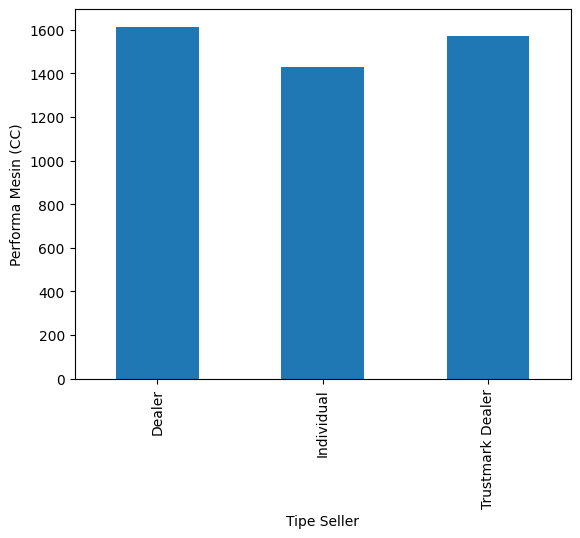

In [1051]:
loaded_data.groupby("seller_type")["engine"].mean().plot(kind="bar")
plt.xlabel("Tipe Seller")
plt.ylabel("Performa Mesin (CC)")
plt.show()

Terlihat bahwa performa mesin yang dijual oleh dealer, ataupun trustmark dealer memiliki performa mesin > 1400 CC.

### Kondisi Data

In [1052]:
loaded_data.describe()

,year,selling_price,km_driven,fuel_eficiency,engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


Dari summary statistik data numerik di atas, terlihat bahwa terdapat beberapa kejanggalan data, seperti nilai minimum fuel eficiency = 0

#### Plot missing value

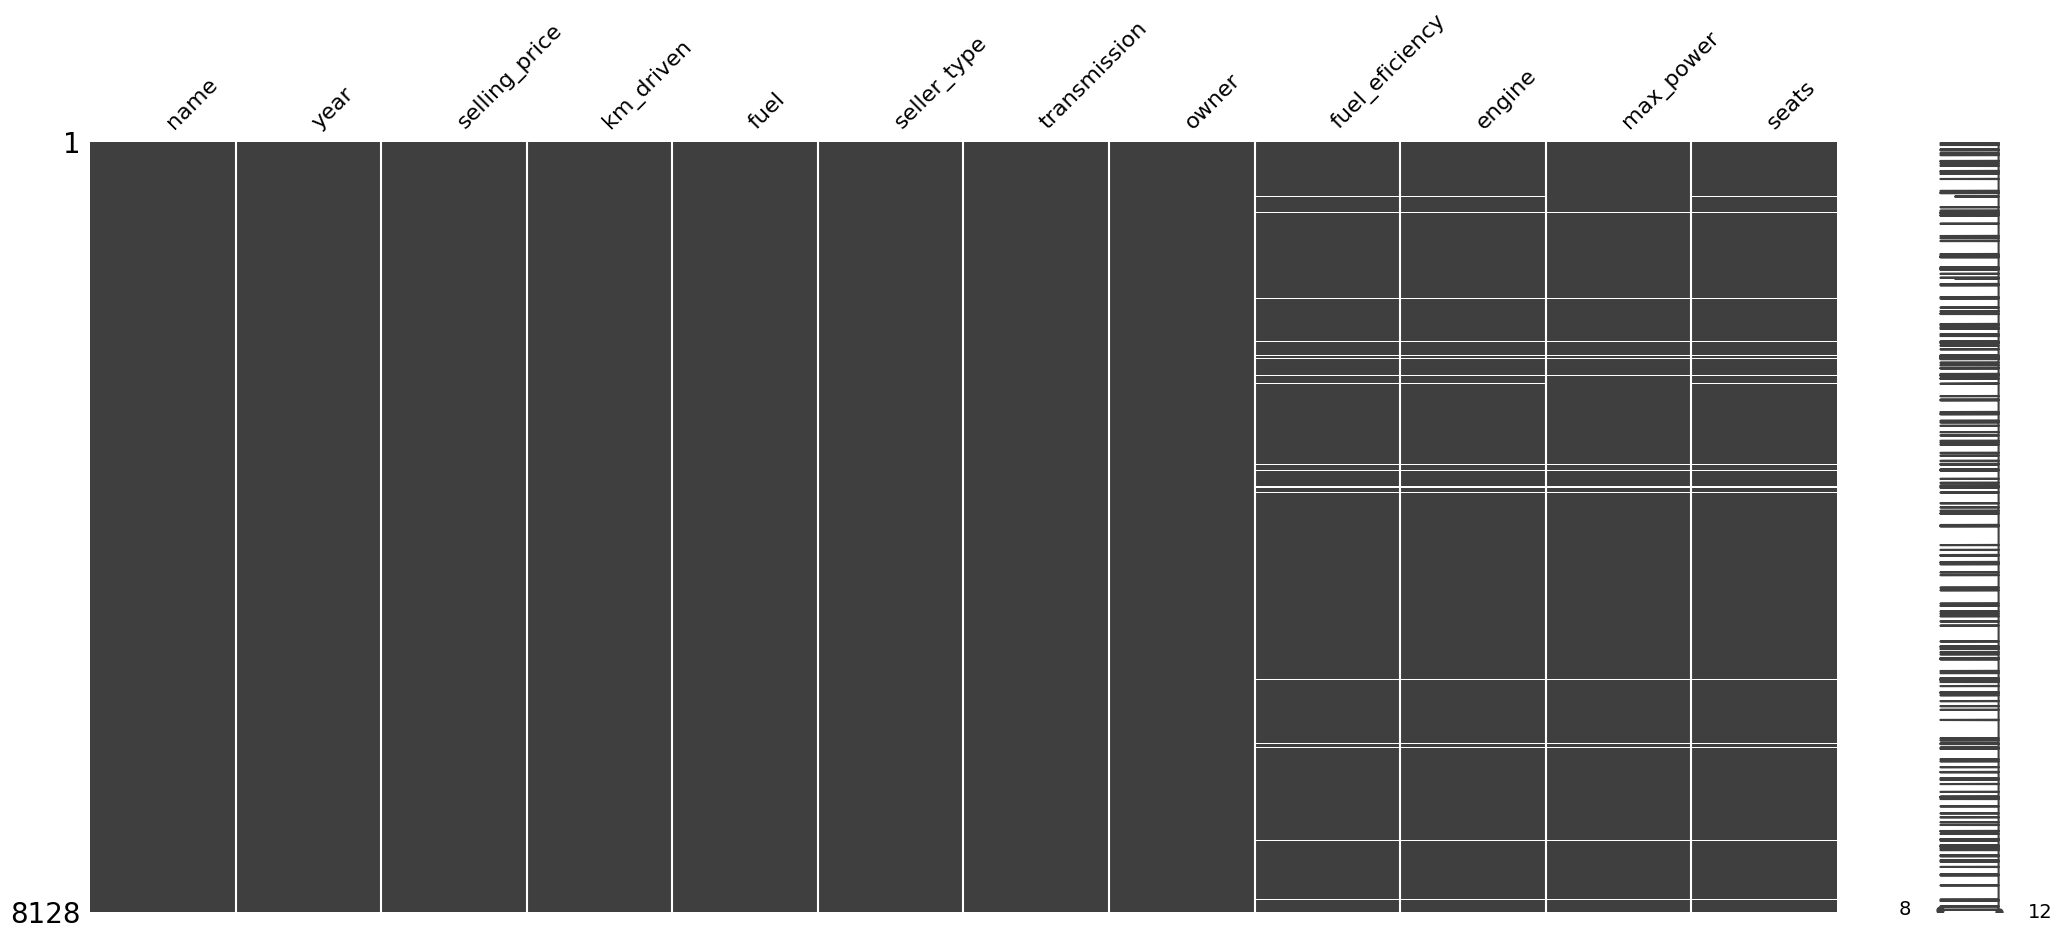

In [1053]:
msno.matrix(loaded_data)
plt.show()

Dari gambaran data di atas, terlihat bahwa kolom fuel_eficiency, engine, max_power, dan seats memiliki garis-garis putih. Hal ini menunjukkan bahwa terdapat missing value atau data kosong pada kolom tersebut

#### Plot outlier dari data penjualan

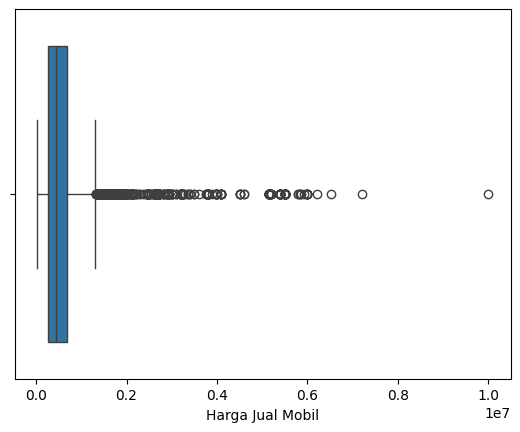

In [1054]:
sns.boxplot(x=loaded_data["selling_price"])
plt.xlabel("Harga Jual Mobil")
plt.show()

Dari grafik tersebut, terlihat bahwa sangat banyak data "harga jual mobil" yang jauh dari rentang normalitas datanya. Rentang tersebut berada di antara 0.0 - 0.2 * 10e7.

#### Plot outlier dari kolom year

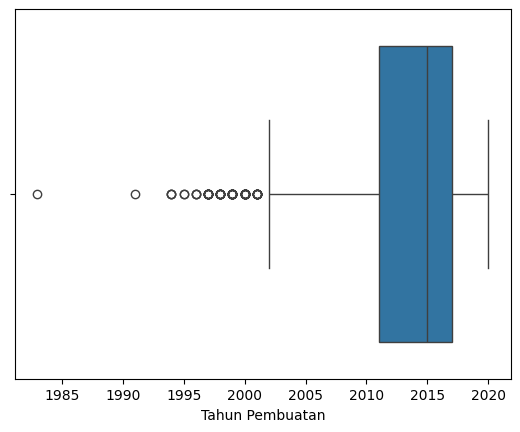

In [1055]:
sns.boxplot(x=loaded_data["year"])
plt.xlabel("Tahun Pembuatan")
plt.show()

Terdapat beberapa data tahun pembuatan mobil yang berada di luar rentang normalitas data.

#### Plot outlier kolom km_driver

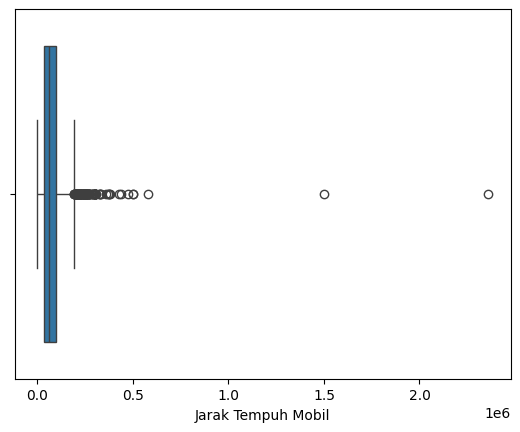

In [1056]:
sns.boxplot(x=loaded_data["km_driven"])
plt.xlabel("Jarak Tempuh Mobil")
plt.show()

Terlihat pada grafik di atas, terdapat beberapa data yang kemunculannya sangat jarang, sehingga sangat berpengaruh terhadap normalitas data

#### Plot outlier fuel_eficiency

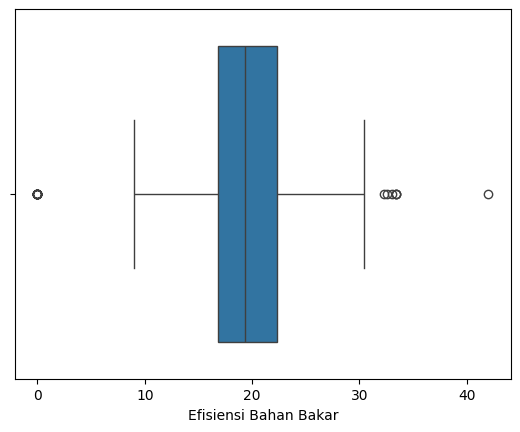

In [1057]:
sns.boxplot(x=loaded_data["fuel_eficiency"])
plt.xlabel("Efisiensi Bahan Bakar")
plt.show()

Hanya terdapat beberapa data efisiensi bahan bakar yang berada di luar rentang normalitas data

#### Plot outlier kolom engine

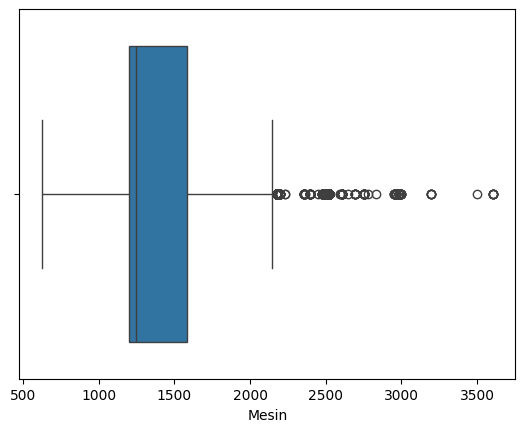

In [1058]:
sns.boxplot(x=loaded_data["engine"])
plt.xlabel("Mesin")
plt.show()

Pada data di atas, normalitas data mesin berada pada rentang 500 hingga 2000. Sehingga data yang berada pada rentang diluar itu termasuk ke dalam outlier

#### Plot outlier kolom max_power

<Axes: xlabel='max_power'>

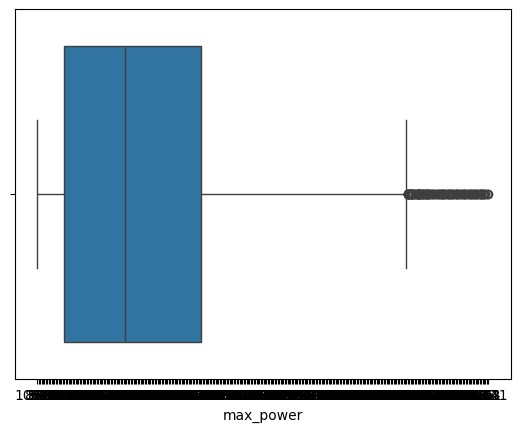

In [1059]:
sns.boxplot(x=loaded_data["max_power"])

## Data Cleaning

### Menghapus Data duplikat

In [1060]:
loaded_data.duplicated().sum()

1202

In [1061]:
print(len(loaded_data));
loaded_data.drop_duplicates(inplace=True)
print(len(loaded_data))
loaded_data

8128
6926


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


### Menangani missing value dengan mengisinya menggunakan nilai rata-rata dari data

#### Melihat terlebih dahulu apakah data yang missing pada kolom tertentu memiliki nilai missing pada kolom lainnya

In [1062]:
# Melihat statistik data
loaded_data.describe()

,year,selling_price,km_driven,fuel_eficiency,engine,seats
count,6926.000000,6.926000e+03,6.926000e+03,6718.00000,6718.000000,6718.000000
mean,2013.420300,5.172707e+05,7.399568e+04,19.46531,1430.891337,5.434653
std,4.078286,5.197670e+05,5.835810e+04,4.04915,493.493277,0.984230
min,1983.000000,2.999900e+04,1.000000e+00,0.00000,624.000000,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,16.80000,1197.000000,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,19.44000,1248.000000,5.000000
75%,2017.000000,6.335000e+05,1.000000e+05,22.50000,1498.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.00000,3604.000000,14.000000


In [1063]:
# Melihat data yang memiliki kolom fuel_eficiency = 0
loaded_data[loaded_data["fuel_eficiency"] == 0]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
644,Tata Indica Vista Aura Safire Anniversary Edition,2009,135000,28900,Petrol,Individual,Manual,Second Owner,0.0,1172.0,65,5.0
785,Hyundai Santro Xing GL,2009,120000,90000,Petrol,Individual,Manual,Second Owner,0.0,1086.0,62,5.0
1649,Hyundai Santro Xing GL,2008,105000,128000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62,5.0
1676,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0,2987.0,165,5.0
2137,Land Rover Freelander 2 TD4 HSE,2013,1650000,64788,Diesel,Dealer,Automatic,First Owner,0.0,2179.0,115,5.0
2366,Hyundai Santro Xing (Non-AC),2010,110000,80000,Petrol,Individual,Manual,Second Owner,0.0,1086.0,62.1,5.0
2725,Hyundai Santro Xing (Non-AC),2013,184000,15000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62.1,5.0
5276,Hyundai Santro Xing GL,2008,175000,40000,Petrol,Individual,Manual,First Owner,0.0,1086.0,62,5.0
5843,Volkswagen Polo GT TSI BSIV,2014,574000,28080,Petrol,Dealer,Automatic,First Owner,0.0,1197.0,103.25,5.0
5846,Volkswagen Polo GT TSI BSIV,2014,575000,28100,Petrol,Dealer,Automatic,First Owner,0.0,1197.0,103.25,5.0


In [1064]:
# Menghitung total masing-masing missing value pada kolom
loaded_data.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
fuel_eficiency,208
engine,208


In [1065]:
# Mengubah missing value menjadi 0
loaded_data.fillna(0, inplace=True)
loaded_data.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
fuel_eficiency,0
engine,0


In [1066]:
# melihat kembali missing value pada datat
filtered_data = loaded_data[loaded_data["fuel_eficiency"] == 0]
filtered_data.iloc[:, -4:]

,fuel_eficiency,engine,max_power,seats
13,0.0,0.0,0,0.0
31,0.0,0.0,0,0.0
78,0.0,0.0,0,0.0
87,0.0,0.0,0,0.0
119,0.0,0.0,0,0.0
...,...,...,...,...
7740,0.0,0.0,0,0.0
7996,0.0,0.0,0,0.0
8009,0.0,0.0,0,0.0
8068,0.0,0.0,0,0.0


Terlihat bahwa nilai missing value pada kolom fuel efficiency, ternyata juga memiliki missing value pada kolom engine, max_power dan seats dengan total data missing value sebanyak 223

In [1067]:
# Menghapus missing value
loaded_data = loaded_data[~(loaded_data["fuel_eficiency"] == 0)]
loaded_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


#### Plot gambar untuk melihat sebaran data sebelum menangani outliers

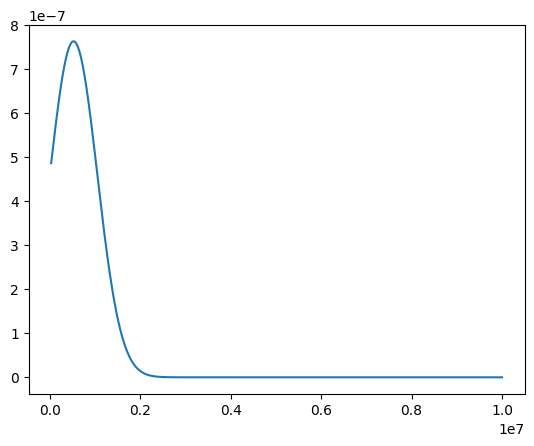

In [1068]:
std = loaded_data["selling_price"].std()
mean = loaded_data["selling_price"].mean()

norm_data = norm.pdf(loaded_data["selling_price"].sort_values(), mean, std);

plt.plot(loaded_data["selling_price"].sort_values(), norm_data);

### Menangani Outliers Dengan
Pada bagian ini, teknik statistik akan digunakan untuk menangani masalah outlier, teknik tersebut adalah distribusi normal Z. Teknik ini memiliki pendekatan sebagai berikut:
1. Menentukan tingkat kepercayaan (99% / 95%) atau menentukan taraf signifikansi alpha (1% / 5%)
2. Menghitung masing-masing standar deviasi, rata-rata
3. Menghitung nilai Z pada masing-masing data yang ada di dataframe menggunakan rumus z score untuk populasi
4. Menentukan apakah data yang dihitung berada di dalam rentang a/2 yang merepresentasikan bukan data outlier dengan cara membandingkan absolute dari z_score hitung berada kurang dari z_threshold (+- z_score > z_threshold)
5. Memperbarui dataframe dengan data terbaru yang sudah dilakukan filter untuk menghilangkan outlier

In [1069]:
# Membuat fungsi yang menerima 2 parameter dengan default signifikansi alpha 5% / 0.05
def outliers(data, alpha = 0.05):
  # Menghitung rata-rata
  std = np.std(data)
  miu = np.mean(data)
  z_score = [(x - miu) / std for x in data]
  z_threshold = 0
  if(alpha == 0.01):
    z_threshold = 2.58
  elif(alpha == 0.05):
    z_threshold = 1.96
  else:
    z_threshold = 1.96
  data_outlier = [x for i, x in enumerate(data) if abs(z_score[i]) > z_threshold]
  return data_outlier


#### Menangani outlier pada kolom selling_price

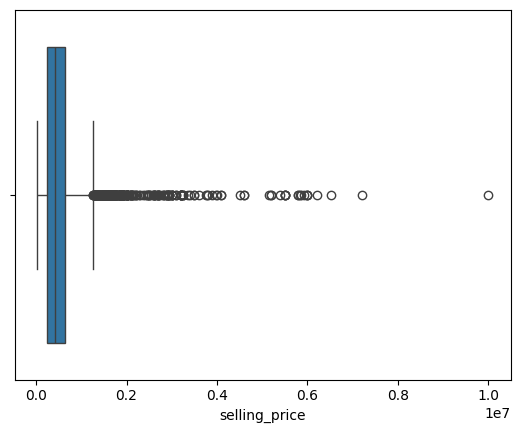

In [1070]:
sns.boxplot(x=loaded_data["selling_price"])
plt.show()

In [1071]:
print(sorted(outliers(loaded_data["selling_price"])))

[1550000, 1550000, 1550000, 1550000, 1550000, 1560000, 1575000, 1575000, 1575000, 1575000, 1575000, 1576000, 1590000, 1594000, 1600000, 1600000, 1600000, 1600000, 1600000, 1600000, 1625000, 1630000, 1630000, 1650000, 1650000, 1650000, 1650000, 1650000, 1650000, 1650000, 1650000, 1650000, 1650000, 1650000, 1670000, 1675000, 1680000, 1680000, 1689999, 1689999, 1689999, 1689999, 1700000, 1700000, 1700000, 1700000, 1700000, 1700000, 1700000, 1700000, 1745000, 1748999, 1750000, 1750000, 1750000, 1750000, 1750000, 1750000, 1750000, 1750000, 1750000, 1757000, 1789999, 1800000, 1800000, 1800000, 1800000, 1800000, 1800000, 1825000, 1825000, 1850000, 1850000, 1850000, 1850000, 1850000, 1850000, 1850000, 1850000, 1859000, 1864999, 1888000, 1898999, 1900000, 1900000, 1900000, 1900000, 1900000, 1920000, 1925000, 1925000, 1925000, 1938000, 1950000, 1950000, 1950000, 1950000, 1950000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2000000, 2051000, 2064000, 

In [1072]:
print(len(outliers(loaded_data["selling_price"])))

215


Terdapat total 134 data harga penjualan yang berada di luar rentang nilai kritis

In [1073]:
# Mengupdate data
updated_data = loaded_data[~loaded_data["selling_price"].isin(outliers(loaded_data["selling_price"]))]
updated_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


In [1074]:
updated_data.describe().astype(int)

,year,selling_price,km_driven,fuel_eficiency,engine,seats
count,6488,6488,6488,6488,6488,6488
mean,2013,456717,74437,19,1401,5
std,3,274415,59165,3,466,0
min,1994,29999,1,9,624,4
25%,2011,250000,40000,17,1196,5
50%,2014,400000,70000,19,1248,5
75%,2017,610250,100000,22,1498,5
max,2020,1530000,2360457,33,3498,14


In [1075]:
loaded_data.describe().astype(int)

,year,selling_price,km_driven,fuel_eficiency,engine,seats
count,6703,6703,6703,6703,6703,6703
mean,2013,525956,73431,19,1430,5
std,3,522472,58736,3,493,0
min,1994,29999,1,9,624,4
25%,2011,250000,38000,16,1197,5
50%,2014,420000,68519,19,1248,5
75%,2017,650000,100000,22,1498,5
max,2020,10000000,2360457,42,3604,14


<Axes: xlabel='selling_price'>

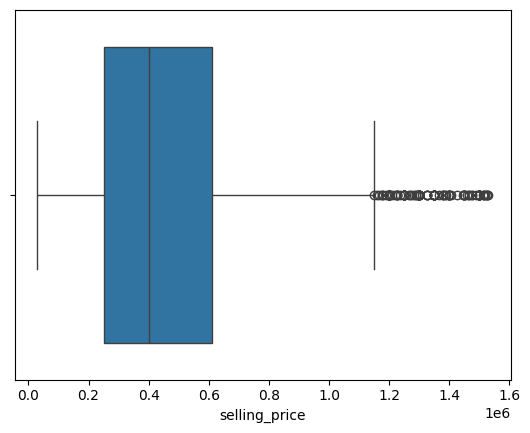

In [1076]:
sns.boxplot(x=updated_data["selling_price"])

#### Menangani Outlier pada Kolom max_power

##### Mengubah tipe data pada kolom max_power dari tipe data object menjadi numeric / float

In [1077]:
updated_data["max_power"] = pd.to_numeric(updated_data["max_power"], errors="coerce")
updated_data.describe()

<ipython-input-1077-7e690ac4ed98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data["max_power"] = pd.to_numeric(updated_data["max_power"], errors="coerce")


,year,selling_price,km_driven,fuel_eficiency,engine,max_power,seats
count,6488.000000,6.488000e+03,6.488000e+03,6488.000000,6488.000000,6487.000000,6488.000000
mean,2013.507861,4.567171e+05,7.443786e+04,19.647334,1401.405518,84.733576,5.425555
std,3.905063,2.744159e+05,5.916532e+04,3.885380,466.713644,26.579721,0.978735
min,1994.000000,2.999900e+04,1.000000e+00,9.000000,624.000000,32.800000,4.000000
25%,2011.000000,2.500000e+05,4.000000e+04,17.000000,1196.000000,67.100000,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,19.700000,1248.000000,81.800000,5.000000
75%,2017.000000,6.102500e+05,1.000000e+05,22.540000,1498.000000,98.600000,5.000000
max,2020.000000,1.530000e+06,2.360457e+06,33.440000,3498.000000,272.000000,14.000000


In [1078]:
updated_data.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
fuel_eficiency,0
engine,0


In [1079]:
updated_data = updated_data.dropna()
updated_data.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
fuel_eficiency,0
engine,0


<Axes: xlabel='max_power'>

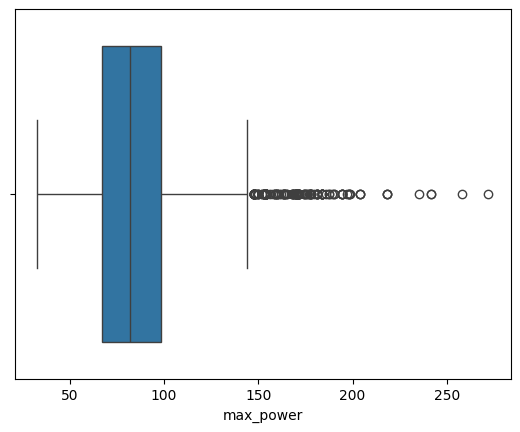

In [1080]:
sns.boxplot(x=updated_data["max_power"])

In [1081]:
print(f"Total outlier { len(outliers(updated_data.max_power)) }")
print(sorted(outliers( updated_data["max_power"] )))

Total outlier 397
[138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.03, 138.08, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 138.1, 139.01, 139.01, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.0, 140.

In [1082]:
updated_data = updated_data[~updated_data["max_power"].isin(outliers(updated_data["max_power"]))]
updated_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [1083]:
updated_data.describe()

,year,selling_price,km_driven,fuel_eficiency,engine,max_power,seats
count,6090.000000,6.090000e+03,6.090000e+03,6090.000000,6090.000000,6090.000000,6090.000000
mean,2013.544335,4.337781e+05,7.307755e+04,19.977015,1348.113629,80.337418,5.361905
std,3.940820,2.489412e+05,5.678279e+04,3.742647,424.393651,20.232003,0.946626
min,1994.000000,2.999900e+04,1.000000e+00,10.500000,624.000000,32.800000,4.000000
25%,2011.000000,2.400000e+05,3.769425e+04,17.500000,1193.000000,67.060000,5.000000
50%,2014.000000,4.000000e+05,6.800000e+04,19.810000,1248.000000,78.900000,5.000000
75%,2017.000000,6.000000e+05,1.000000e+05,22.740000,1493.000000,90.000000,5.000000
max,2020.000000,1.460000e+06,2.360457e+06,33.440000,2956.000000,135.100000,14.000000


<Axes: xlabel='max_power'>

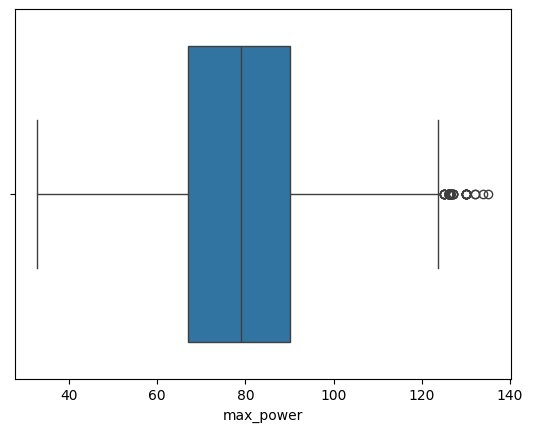

In [1084]:
sns.boxplot(x=updated_data["max_power"])

### Menangani outlier pada kolom km_driven

<Axes: xlabel='km_driven'>

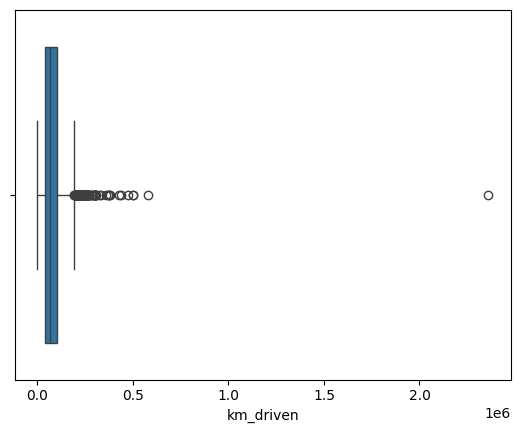

In [1085]:
sns.boxplot(x=updated_data["km_driven"])

In [1086]:
updated_data = updated_data[~updated_data["km_driven"].isin(outliers(updated_data["km_driven"]))]
updated_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


<Axes: xlabel='km_driven'>

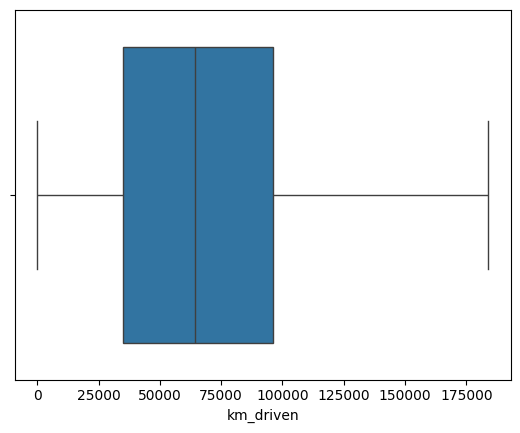

In [1087]:
sns.boxplot(x=updated_data["km_driven"])

In [1088]:
updated_data.describe().astype(int)

,year,selling_price,km_driven,fuel_eficiency,engine,max_power,seats
count,5907,5907,5907,5907,5907,5907,5907
mean,2013,435334,67725,20,1331,80,5
std,3,249251,38556,3,406,20,0
min,1994,29999,1,10,624,32,4
25%,2011,245000,35000,17,1186,67,5
50%,2014,400000,64481,20,1248,78,5
75%,2017,600000,96000,22,1493,88,5
max,2020,1460000,184000,33,2956,135,14


## Normal Distribution Testing

In [1089]:
updated_data.describe()

,year,selling_price,km_driven,fuel_eficiency,engine,max_power,seats
count,5907.000000,5.907000e+03,5907.000000,5907.000000,5907.000000,5907.000000,5907.000000
mean,2013.650076,4.353341e+05,67725.374302,20.086724,1331.500085,80.132608,5.330455
std,3.909268,2.492519e+05,38556.971751,3.685085,406.851802,20.231173,0.909087
min,1994.000000,2.999900e+04,1.000000,10.500000,624.000000,32.800000,4.000000
25%,2011.000000,2.450000e+05,35000.000000,17.700000,1186.000000,67.050000,5.000000
50%,2014.000000,4.000000e+05,64481.000000,20.000000,1248.000000,78.900000,5.000000
75%,2017.000000,6.000000e+05,96000.000000,22.740000,1493.000000,88.800000,5.000000
max,2020.000000,1.460000e+06,184000.000000,33.440000,2956.000000,135.100000,14.000000


In [1090]:
def calculate_normal_data(data, is_save = False):
  std = np.std(data)
  mean = np.mean(data)
  norm_data = norm.pdf(data.sort_values(), mean, std)
  return norm_data

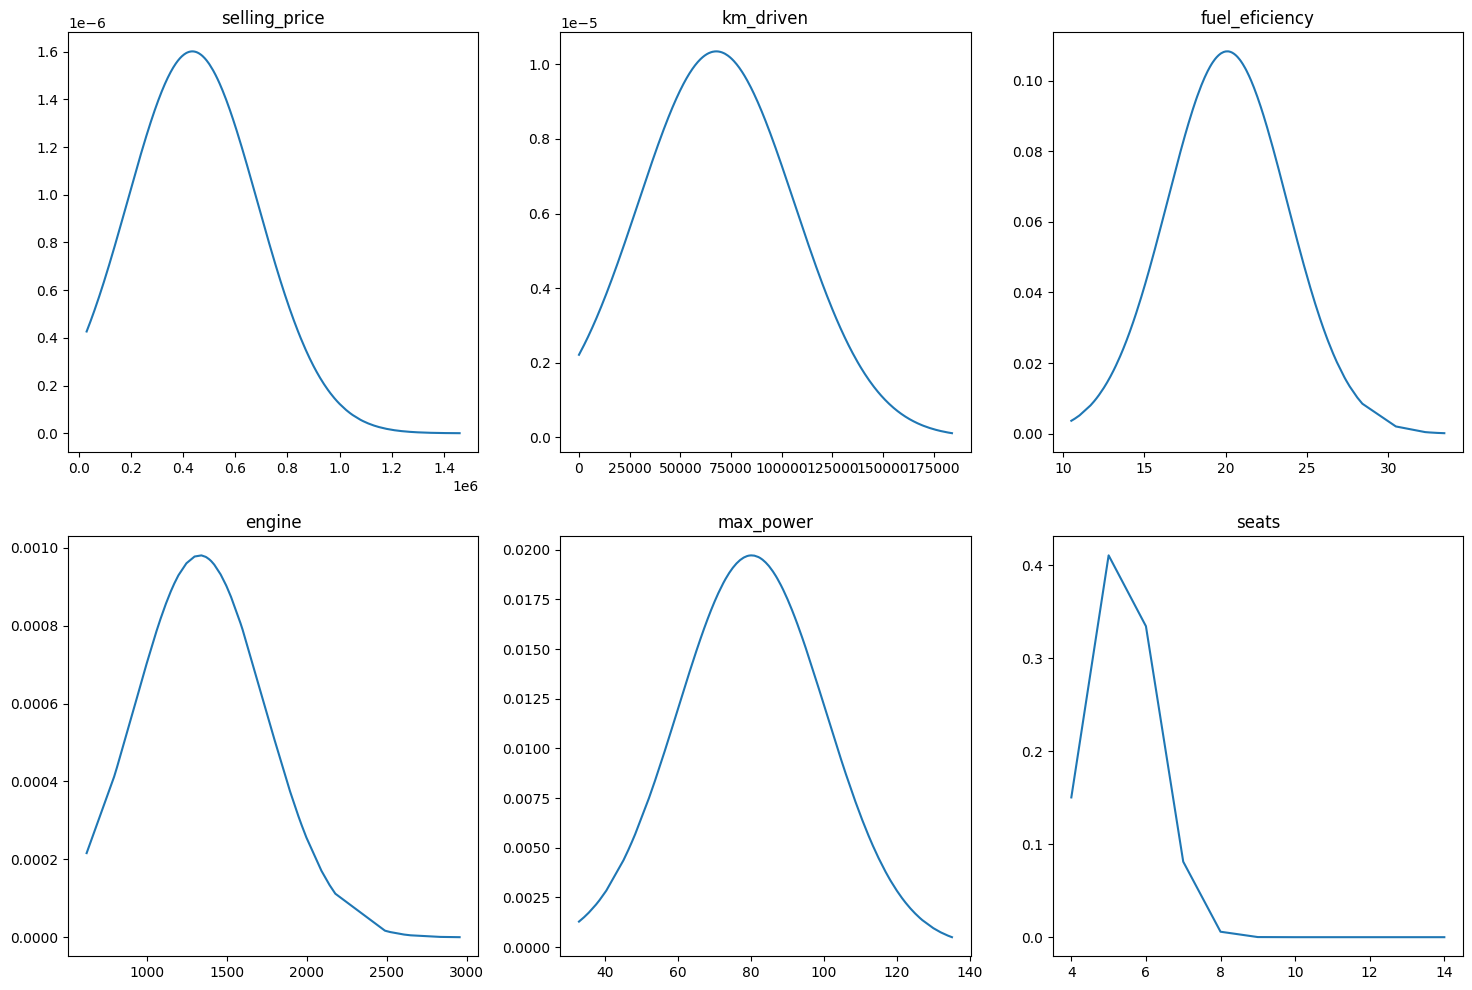

In [1091]:
col_index = 0
row_index = 0
fig, ax = plt.subplots(2, 3, figsize=(18, 12))
for i, x in enumerate(updated_data[["selling_price", "km_driven", "fuel_eficiency", "engine", "max_power", "seats"]].columns):
  ax[row_index, col_index].plot(updated_data[x].sort_values(), calculate_normal_data(updated_data[x]), label=x)
  ax[row_index, col_index].set_title(x)
  if col_index == 2:
    row_index += 1
    col_index = 0
    continue
  col_index+=1


In [1092]:
updated_data.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
count,5907,5907.000000,5.907000e+03,5907.000000,5907,5907,5907,5907,5907.000000,5907.000000,5907.000000,5907.000000
unique,1661,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,118,NaN,NaN,NaN,2959,5373,5606,3695,NaN,NaN,NaN,NaN
mean,NaN,2013.650076,4.353341e+05,67725.374302,NaN,NaN,NaN,NaN,20.086724,1331.500085,80.132608,5.330455
std,NaN,3.909268,2.492519e+05,38556.971751,NaN,NaN,NaN,NaN,3.685085,406.851802,20.231173,0.909087
min,NaN,1994.000000,2.999900e+04,1.000000,NaN,NaN,NaN,NaN,10.500000,624.000000,32.800000,4.000000
25%,NaN,2011.000000,2.450000e+05,35000.000000,NaN,NaN,NaN,NaN,17.700000,1186.000000,67.050000,5.000000
50%,NaN,2014.000000,4.000000e+05,64481.000000,NaN,NaN,NaN,NaN,20.000000,1248.000000,78.900000,5.000000
75%,NaN,2017.000000,6.000000e+05,96000.000000,NaN,NaN,NaN,NaN,22.740000,1493.000000,88.800000,5.000000


## Uji Hipotesis

Uji hipotesis merupakan metode statisitk dalam membuktikan hipotesis berdasarkan data. Langkah sebelumnya telah dilakukan EDA guna mengeksplorasi insight apa saja yang bisa didapatkan pada data. Pada bagian ini, pendekatan statistik akan digunakan untuk menguji hipotesis dalam membuktikan
1. Tipe bahan bakar diesel lebih efisien dalam hal jarak tempuh dibandingkan dengan tipe lainnya

In [1093]:
def calculate_z(mean1, mean2, std1, std2, n1, n2, d0 = 0):
  z = (mean1 - mean2 - d0)  / (np.sqrt((std1 ** 2 / n1) + (std2 ** 2 / n2)))
  return z

def conclude_hypotesis(z, a=0.05, side_test="dual"):
  z0, z1 = -1.96, 1.96

  if(side_test == "dual"):
    if a == 0.01:
      z0, z1 = -2.58, 2.58
    if(z > z0 and z < z1):
      print(f"Terima H0 karena {z0:.2f} < {z:.2f} < {z1:.2f}")
    else:
      print(f"Tolak H0 karena {z} diluar rentang [{z0:.2f}, {z1:.2f}]")

  elif(side_test == "right"):
    if a == 0.05:
      z1 = 1.65
    elif a == 0.01:
      z1 = 2.33
    if(z < z1):
      print(f"Terima H0 karena {z:.2f} < {z1:.2f}")
    else:
      print(f"Tolak H0 karena {z:.2f} > {z1:.2f}")
  elif(side_test == "left"):
    if a == 0.05:
      z0 = -1.65
    elif a == 0.01:
      z0 = -2.33

    if(z > z0):
      print(f"Terima H0 karena {z:.2f} > {z0:.2f}")
    else:
      print(f'Tolak H0 karena {z:.2f} < {z1:.2f}')
  return z0, z1

def calculate_z_mean_between_two_statistic(data1, data2, a=0.05, side_test="dual"):
  mean1 = data1.mean()
  mean2 = data2.mean()
  std1 = data1.std()
  std2 = data2.std()
  n1 = data1.count()
  n2 = data2.count()

  z = calculate_z(mean1, mean2, std1, std2, n1, n2)
  z0, z1 = conclude_hypotesis(z, a, side_test=side_test)
  return z0, z1, z

def calculate_z_proportion_between_two_statistics(data1, data2, n1, n2):
  total_data1 = data1.count() #n1
  total_data2 = data2.count() #n2
  p1 = n1 / total_data1 #p1
  p2 = n2 / total_data2 #p2
  p = float(((n1 + n2) / (total_data1 + total_data2)))
  q = float(1 - p)
  z = float((p1 - p2) / np.sqrt((p * q) * ((1 / total_data1) + (1 / total_data2))))
  return z

def calculate_proportion_between_two_statistic(data1, data2, a=0.05, side_test="dual", n1=0, n2=0):
  z = calculate_z_proportion_between_two_statistics(data1, data2, n1, n2)
  conclude_hypotesis(z, a, side_test=side_test)
  return z

In [1094]:
def count_sample_using_slovin(population_size, error = 0.05):
  return int(np.ceil(population_size / (1 + population_size * (error ** 2) )))

count_sample_using_slovin(5000, 0.01)

3334

In [1095]:
updated_data.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
count,5907,5907.000000,5.907000e+03,5907.000000,5907,5907,5907,5907,5907.000000,5907.000000,5907.000000,5907.000000
unique,1661,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,118,NaN,NaN,NaN,2959,5373,5606,3695,NaN,NaN,NaN,NaN
mean,NaN,2013.650076,4.353341e+05,67725.374302,NaN,NaN,NaN,NaN,20.086724,1331.500085,80.132608,5.330455
std,NaN,3.909268,2.492519e+05,38556.971751,NaN,NaN,NaN,NaN,3.685085,406.851802,20.231173,0.909087
min,NaN,1994.000000,2.999900e+04,1.000000,NaN,NaN,NaN,NaN,10.500000,624.000000,32.800000,4.000000
25%,NaN,2011.000000,2.450000e+05,35000.000000,NaN,NaN,NaN,NaN,17.700000,1186.000000,67.050000,5.000000
50%,NaN,2014.000000,4.000000e+05,64481.000000,NaN,NaN,NaN,NaN,20.000000,1248.000000,78.900000,5.000000
75%,NaN,2017.000000,6.000000e+05,96000.000000,NaN,NaN,NaN,NaN,22.740000,1493.000000,88.800000,5.000000


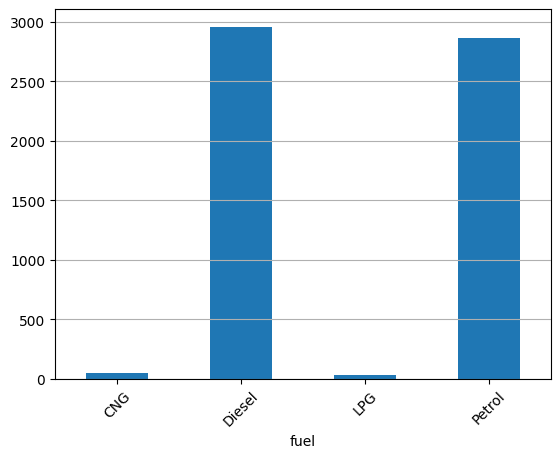

In [1096]:
updated_data.groupby("fuel")["km_driven"].count().plot(kind="bar")
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.show()

### Membuktikan tipe bahan bakar diesel lebih efisien dibandingkan dengan tipe lainnya

Hipotesis 0: Tidak ada perbedan efisiensi tipe bahan bakar diesel dengan tipe bahan bakar lainnya

Hipotesis 1: Ada perbedaan dalam hal efisiensi bahan bakar diesel dengan bahan bakar lainnya

#### Diesel dengan CNG

H0: Tidak ada perbedaan efisiensi tipe bahan bakar diesel dengan cng

H1: Ada perbedaan dalam hal efisiensi bahan bakar diesel dengan bahan bakar cng

In [1097]:
diesel_data = updated_data[updated_data["fuel"] == "Diesel"]["fuel_eficiency"]
diesel_sample = diesel_data.sample(n=40, random_state=42)

In [1098]:
cng_data = updated_data[updated_data["fuel"] == "CNG"]["fuel_eficiency"]
cng_sample = cng_data.sample(n=40, random_state=42)

z0, z1, zhitung = calculate_z_mean_between_two_statistic(diesel_sample, cng_sample, 0.01)

Tolak H0 karena -3.1249738330038235 diluar rentang [-2.58, 2.58]


Dengan demikian dapat dikatakan bahwa dengan keyakinan sebesar 99% Tidak ada perbedaan efisiensi antara tipe bahan bakar diesel dengan tipe bahan bakar CNG

#### Diesel dengan LPG

In [1099]:
lpg_data = updated_data[updated_data["fuel"] == "LPG"]["fuel_eficiency"]
lpg_sample = lpg_data.sample(n=30, random_state=42)

z0, z1, zhitung = calculate_z_mean_between_two_statistic(diesel_sample, lpg_sample, 0.01)

Tolak H0 karena 2.8208841713660306 diluar rentang [-2.58, 2.58]


Dengan demikian dapat dikatakan bahwa dengan keyakinan sebesar 99% Tidak ada perbedaan efisiensi dalam hal jarak tempuh antara tipe bahan bakar diesel dengan tipe bahan bakar CNG

#### Diesel dengan Petrol

In [1100]:
petrol_data = updated_data[updated_data["fuel"] == "Petrol"]["fuel_eficiency"]
petrol_sample = petrol_data.sample(n=40, random_state=42)

z0, z1, zhitung = calculate_z_mean_between_two_statistic(petrol_data, petrol_sample)

Terima H0 karena -1.96 < -0.01 < 1.96


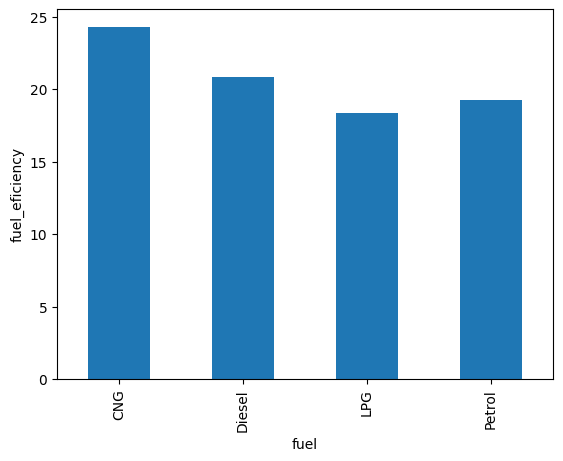

In [1101]:
updated_data.groupby("fuel")["fuel_eficiency"].mean().plot(kind="bar")
plt.ylabel("fuel_eficiency")
plt.show()

Dengan demikian dapat dikatakan bahwa dengan keyakinan sebesar 99% Tidak ada perbedaan efisiensi dalam hal jarak tempuh antara tipe bahan bakar diesel dengan tipe bahan bakar CNG

### Menguji apakah harga mobil otomatic lebih mahal dari mobil manual

H0: Harga mobil dengan transmisi otomatic <= harga mobil dengan transmisi manual

H1: Harga mobil dengan transmisi otomatci > harga mobil dengan transmisi manual

In [1102]:
# Membandingkan apakah harga mobil otomatic lebih mahal

manual_data = updated_data[updated_data["transmission"] == "Manual"]["selling_price"]
auto_data = updated_data[updated_data["transmission"] == "Automatic"]["selling_price"]

manual_sample = manual_data.sample(n=40, random_state=42)
auto_sample = auto_data.sample(n=40, random_state=42)

z0, z1, zhitung = calculate_z_mean_between_two_statistic(auto_data, manual_data, side_test="right", a = 0.01)

Tolak H0 karena 13.85 > 2.33


Sehingga dapat dikatakan bahwa dengan keyakinan 99% harga rata-rata mobil dengan transmisi automatic lebih mahal daripada harga mobil dengan transmisi manual

### Menguji rata-rata harga jual mobil berdasarkan bahan bakar

H0: Tidak ada perbedaan antara rata-rata harga jual mobil berdasarkan bahan bakar bensin dengan tipe bahan bakar lainnya

H1: Terdapat perbedaan rata-rata harga jual mobil berdasarkan bahan bakar bensin dengan tipe bahan bakar lainnya

<Axes: xlabel='fuel'>

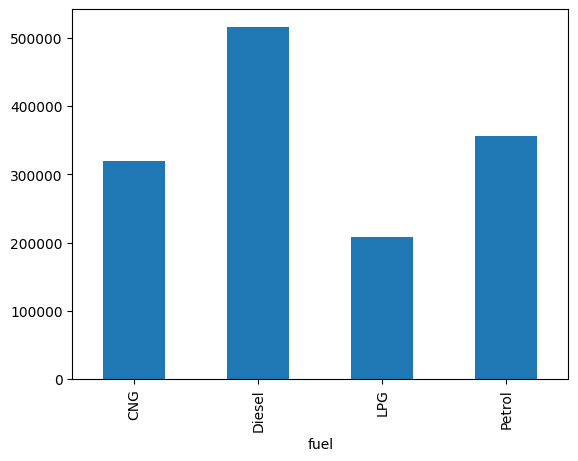

In [1103]:
updated_data.groupby("fuel")["selling_price"].mean().plot(kind="bar")

In [1104]:
bensin_data = updated_data[updated_data["fuel"] == "Petrol"]["selling_price"]
bensin_sample = bensin_data.sample(n=30, random_state=42)

#### Menguji harga rata-rata mobil dengan bahan bakar bensin dengan Diesel

In [1105]:
diesel_data = updated_data[updated_data["fuel"] == "Diesel"]["selling_price"]
diesel_sample = diesel_data.sample(n=30, random_state=42)

z0, z1, zhitung = calculate_z_mean_between_two_statistic(bensin_sample, diesel_sample)

Tolak H0 karena -2.8398553887218374 diluar rentang [-1.96, 1.96]


Dapat disimpulkan bahwa dengan keyakinan 95%, terdapat perbedaan harga rata-rata mobil dengan bahan bakar bensin dengan bahan bakar diesel

#### Menguji harga rata-rata mobil bahan bakar bensin dengan LPG

In [1106]:
lpg_data = updated_data[updated_data["fuel"] == "LPG"]["selling_price"]
lpg_sample = lpg_data.sample(n=30, random_state=42)

z0, z1, zhitung = calculate_z_mean_between_two_statistic(bensin_sample, lpg_sample)

Tolak H0 karena 3.1459467083182076 diluar rentang [-1.96, 1.96]


Dapat disimpulkan bahwa dengan keyakinan 95%, terdapat perbedaan harga rata-rata mobil dengan bahan bakar bensin dengan bahan bakar LPG

#### Menguji harga rata-rata mobil bahan bakar bensin dengan CNG

In [1107]:
cng_data = updated_data[updated_data["fuel"] == "CNG"]["selling_price"]
cng_sample = cng_data.sample(n=30, random_state=42)

z0, z1, zhitung = calculate_z_mean_between_two_statistic(bensin_sample, cng_sample)

Terima H0 karena -1.96 < 0.98 < 1.96


Dapat disimpulkan bahwa dengan keyakinan 95%, Tidak ada perbedaan harga rata-rata mobil dengan bahan bakar bensin dengan bahan bakar CNG

### Menguji proporsi tipe seller individu dengan seller dealer

H0: Proporsi individu paling sedikit 60%

H1: Proporsi individu < 60%

In [1108]:
seller = updated_data[updated_data["seller_type"].isin(["Individual", "Dealer"])]
seller

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [1109]:
sample_seller = seller.sample(n = count_sample_using_slovin(len(seller), error=0.01), random_state=42)
p_group = sample_seller.groupby("seller_type")["seller_type"].count()
n_total_individu = p_group["Individual"]
n_total_dealer = p_group["Dealer"]

individu_seller = sample_seller[sample_seller["seller_type"] == "Individual"]["seller_type"]
dealer_seller = sample_seller[sample_seller["seller_type"] == "Dealer"]["seller_type"]

p = 0.6
p_tuple = n_total_individu / len(sample_seller)

z = (p_tuple - p) / np.sqrt((p * (1 - p)) / len(sample_seller))
conclude_hypotesis(z, a=0.01, side_test="left")

Terima H0 karena 38.96 > -2.33


(-2.33, 1.96)

Sehingga dapat disimpukan bahwa dengan keyakinan 99%, proporsi penjual mobil yang individu memiliki proporsi minimal paling sedikit 60% (> 0.06)

#### Menguji proporsi tipe seller individu diantara satu sample dengan sampel lainya

H0: Proporsi seller indidu pada sample satu sama dengan proporsi individu yang ada pada sample 2

H1: Proporsi seller individu pada sample satu tidak sama dengan proporsi individu pada sample 2

In [1110]:
sample_1 = seller.iloc[:300]["seller_type"]
sample_2 = seller.iloc[300:525]["seller_type"]

n_individu1 = sample_1[sample_1 == "Individual"]
n_individu2 = sample_2[sample_2 == "Individual"]
z = calculate_proportion_between_two_statistic(sample_1, sample_2, 0.05, n1 = n_individu1.count(), n2 = n_individu2.count())

Tolak H0 karena -3.8915589124707823 diluar rentang [-1.96, 1.96]


Sehingga dapat dikatakan dengan keyakinan 99%, proporsi pada sample 1 tidak sama dengan proporsi pada sample2

### Uji rata-rata harga jual berdasarkan jenis penjual
Asumsi: harga yang dijual oleh individu lebih murah dibandingkan dengan harga jual oleh dealer

H0: Rata-rata harga jual individu >= rata-rata harga jual dealer

H1: Rata-rata harga jual individu < rata-rata harga jual dealer

In [1111]:
individu_data = seller[seller["seller_type"] == "Individual"]["selling_price"]
dealer_data = seller[seller["seller_type"] == "Dealer"]["selling_price"]

z0, z1, zhitung = calculate_z_mean_between_two_statistic(individu_data, dealer_data, side_test="left")

Tolak H0 karena -12.24 < 1.96


<Axes: xlabel='seller_type'>

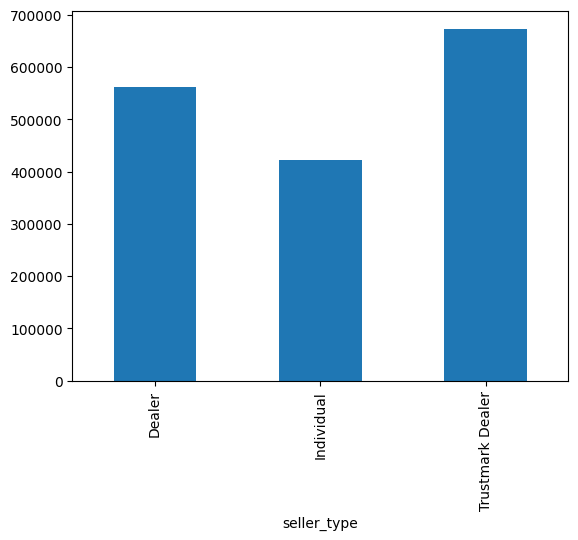

In [1112]:
updated_data.groupby("seller_type")["selling_price"].mean().plot(kind="bar")

### Menguji harga jual tahun 2020 setelah covid 19 lebih murah dibandingkan dengan harga jual tahun 2015 sebelum covid

H0: Harga jual tahun 2020 lebih besar sama dengan harga jual rata-rata tahun 2015

H1: Harga jual tahun 2020 lebih kecil dari harga jual rata-rata tahun 2015

In [1113]:
data_2020 = updated_data[updated_data["year"] == 2020]
data_2015 = updated_data[updated_data["year"] == 2015]

sample_2020 = data_2020.sample(n=50, random_state=42)
sample_2015 = data_2015.sample(n=50, random_state=42)

z0, z1, zhitung = calculate_z_mean_between_two_statistic(sample_2020["selling_price"], sample_2015["selling_price"], a=0.01, side_test="left")

Terima H0 karena 1.12 > -2.33


Sehingga, dengan keyakinan sebesar 99% dapat dikatakan bahwa h0 diterima, artinya adalah bahwa harga jual mobil tahun 2020 setelah covid19 masih tinggi dibandingkan dengan harga jual mobil tahun 2015

In [1114]:
updated_data.groupby("year")["selling_price"].mean()[[2015, 2020]]

,selling_price
year,
2015,527521.687601
2020,553439.940000


### Menguji rata-rata harga jual berdasarkan pemilik

H0: Rata-rata harga jual pemilik pertama lebih besar sama dengan rata-rata harga jual pemilik kedua

H1: Rata-rata harga jual pemilik permata lebih kecil dari rata-rata harga jual pemilik kedua

In [1115]:
first_owner_data = updated_data[updated_data["owner"] == "First Owner"]
second_owner_data = updated_data[updated_data["owner"] == "Second Owner"]

first_owner_sample = first_owner_data.sample(n = 500, random_state=42)
second_owner_sample = second_owner_data.sample(n = 500, random_state=42)

z0, z1, zhitung = calculate_z_mean_between_two_statistic(first_owner_sample["selling_price"], second_owner_sample["selling_price"], side_test="left")

Terima H0 karena 11.51 > -1.65


## Analisis Korelasi

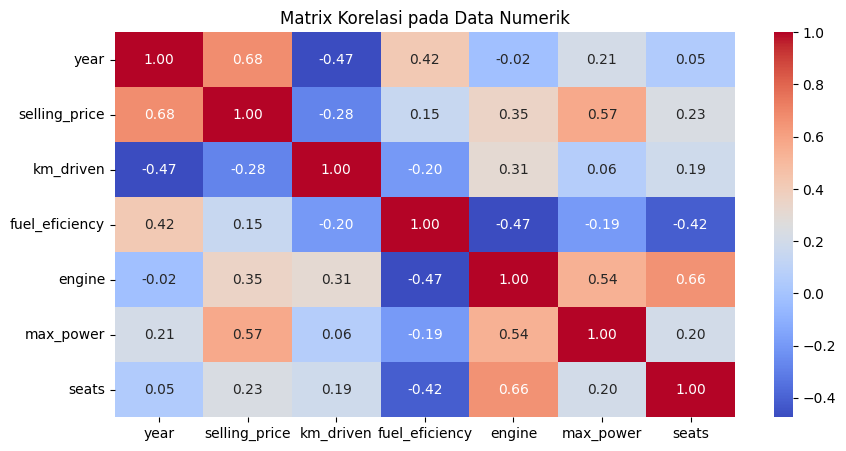

In [1116]:
numeric_features = updated_data.select_dtypes(include=['number'])
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrix Korelasi pada Data Numerik')
plt.show()

## Data Preparation

In [1117]:
categoricals = ["fuel", "seller_type", "owner", "transmission"]
numericals = ["km_driven", "engine", "max_power", "fuel_eficiency", "seats", "year"]

In [1118]:
# Backup updated_data
updated_data_backup = updated_data.copy()
updated_data_backup

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [1119]:
updated_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [1120]:
updated_data.describe()

,year,selling_price,km_driven,fuel_eficiency,engine,max_power,seats
count,5907.000000,5.907000e+03,5907.000000,5907.000000,5907.000000,5907.000000,5907.000000
mean,2013.650076,4.353341e+05,67725.374302,20.086724,1331.500085,80.132608,5.330455
std,3.909268,2.492519e+05,38556.971751,3.685085,406.851802,20.231173,0.909087
min,1994.000000,2.999900e+04,1.000000,10.500000,624.000000,32.800000,4.000000
25%,2011.000000,2.450000e+05,35000.000000,17.700000,1186.000000,67.050000,5.000000
50%,2014.000000,4.000000e+05,64481.000000,20.000000,1248.000000,78.900000,5.000000
75%,2017.000000,6.000000e+05,96000.000000,22.740000,1493.000000,88.800000,5.000000
max,2020.000000,1.460000e+06,184000.000000,33.440000,2956.000000,135.100000,14.000000


In [1121]:
updated_data.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
count,5907,5907.000000,5.907000e+03,5907.000000,5907,5907,5907,5907,5907.000000,5907.000000,5907.000000,5907.000000
unique,1661,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,118,NaN,NaN,NaN,2959,5373,5606,3695,NaN,NaN,NaN,NaN
mean,NaN,2013.650076,4.353341e+05,67725.374302,NaN,NaN,NaN,NaN,20.086724,1331.500085,80.132608,5.330455
std,NaN,3.909268,2.492519e+05,38556.971751,NaN,NaN,NaN,NaN,3.685085,406.851802,20.231173,0.909087
min,NaN,1994.000000,2.999900e+04,1.000000,NaN,NaN,NaN,NaN,10.500000,624.000000,32.800000,4.000000
25%,NaN,2011.000000,2.450000e+05,35000.000000,NaN,NaN,NaN,NaN,17.700000,1186.000000,67.050000,5.000000
50%,NaN,2014.000000,4.000000e+05,64481.000000,NaN,NaN,NaN,NaN,20.000000,1248.000000,78.900000,5.000000
75%,NaN,2017.000000,6.000000e+05,96000.000000,NaN,NaN,NaN,NaN,22.740000,1493.000000,88.800000,5.000000


In [1122]:
print(updated_data["fuel"].unique())
print(updated_data["seller_type"].unique())
print(updated_data["owner"].unique())
print(updated_data["transmission"].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
['Manual' 'Automatic']


In [1123]:
le = LabelEncoder()

In [1124]:
ownerEncoder = le.fit_transform(updated_data["owner"])
ownerEncoder

array([0, 2, 4, ..., 0, 1, 0])

In [1125]:
one_hot_encoded = pd.get_dummies(updated_data[["seller_type", "fuel"]])
one_hot_encoded

,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,False,True,False,False,True,False,False
1,False,True,False,False,True,False,False
2,False,True,False,False,False,False,True
3,False,True,False,False,True,False,False
4,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...
8121,False,True,False,False,False,False,True
8122,False,True,False,False,True,False,False
8123,False,True,False,False,False,False,True
8124,False,True,False,False,True,False,False


In [1126]:
transmission = updated_data.transmission.apply(lambda x: 1 if x == "Automatic" else 0)
transmission.unique()

array([0, 1])

In [1127]:
updated_data["owner"] = ownerEncoder
updated_data

<ipython-input-1127-1fa630ad78ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data["owner"] = ownerEncoder


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,2,18.90,998.0,67.10,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,2,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,0,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,1,16.80,1493.0,110.00,5.0


In [1128]:
updated_data["transmission"] = transmission
updated_data

<ipython-input-1128-31b0baac0c1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data["transmission"] = transmission


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_eficiency,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,0,0,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,0,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,0,4,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,0,0,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,0,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,0,2,18.90,998.0,67.10,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,0,2,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,0,0,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,0,1,16.80,1493.0,110.00,5.0


In [1129]:
updated_data = pd.concat([updated_data, one_hot_encoded], axis=1)
updated_data = updated_data.drop(columns=["fuel", "seller_type"])
updated_data

,name,year,selling_price,km_driven,transmission,owner,fuel_eficiency,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,Maruti Swift Dzire VDI,2014,450000,145500,0,0,23.40,1248.0,74.00,5.0,False,True,False,False,True,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,2,21.14,1498.0,103.52,5.0,False,True,False,False,True,False,False
2,Honda City 2017-2020 EXi,2006,158000,140000,0,4,17.70,1497.0,78.00,5.0,False,True,False,False,False,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,0,23.00,1396.0,90.00,5.0,False,True,False,False,True,False,False
4,Maruti Swift VXI BSIII,2007,130000,120000,0,0,16.10,1298.0,88.20,5.0,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,0,2,18.90,998.0,67.10,5.0,False,True,False,False,False,False,True
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,0,2,22.54,1396.0,88.73,5.0,False,True,False,False,True,False,False
8123,Hyundai i20 Magna,2013,320000,110000,0,0,18.50,1197.0,82.85,5.0,False,True,False,False,False,False,True
8124,Hyundai Verna CRDi SX,2007,135000,119000,0,1,16.80,1493.0,110.00,5.0,False,True,False,False,True,False,False


In [1130]:
updated_data["year"] = 2024 - updated_data["year"]
updated_data = updated_data.drop(columns=["name"])
updated_data

,year,selling_price,km_driven,transmission,owner,fuel_eficiency,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,10,450000,145500,0,0,23.40,1248.0,74.00,5.0,False,True,False,False,True,False,False
1,10,370000,120000,0,2,21.14,1498.0,103.52,5.0,False,True,False,False,True,False,False
2,18,158000,140000,0,4,17.70,1497.0,78.00,5.0,False,True,False,False,False,False,True
3,14,225000,127000,0,0,23.00,1396.0,90.00,5.0,False,True,False,False,True,False,False
4,17,130000,120000,0,0,16.10,1298.0,88.20,5.0,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,11,260000,50000,0,2,18.90,998.0,67.10,5.0,False,True,False,False,False,False,True
8122,10,475000,80000,0,2,22.54,1396.0,88.73,5.0,False,True,False,False,True,False,False
8123,11,320000,110000,0,0,18.50,1197.0,82.85,5.0,False,True,False,False,False,False,True
8124,17,135000,119000,0,1,16.80,1493.0,110.00,5.0,False,True,False,False,True,False,False


In [1131]:
# Convert rupee to IDR per 04/12/2024
updated_data["selling_price"] = updated_data["selling_price"] * 188.02
updated_data

,year,selling_price,km_driven,transmission,owner,fuel_eficiency,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,10,84609000.0,145500,0,0,23.40,1248.0,74.00,5.0,False,True,False,False,True,False,False
1,10,69567400.0,120000,0,2,21.14,1498.0,103.52,5.0,False,True,False,False,True,False,False
2,18,29707160.0,140000,0,4,17.70,1497.0,78.00,5.0,False,True,False,False,False,False,True
3,14,42304500.0,127000,0,0,23.00,1396.0,90.00,5.0,False,True,False,False,True,False,False
4,17,24442600.0,120000,0,0,16.10,1298.0,88.20,5.0,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,11,48885200.0,50000,0,2,18.90,998.0,67.10,5.0,False,True,False,False,False,False,True
8122,10,89309500.0,80000,0,2,22.54,1396.0,88.73,5.0,False,True,False,False,True,False,False
8123,11,60166400.0,110000,0,0,18.50,1197.0,82.85,5.0,False,True,False,False,False,False,True
8124,17,25382700.0,119000,0,1,16.80,1493.0,110.00,5.0,False,True,False,False,True,False,False


In [1132]:
features = updated_data.drop(columns=["selling_price"])
labels = updated_data["selling_price"]

features_column = features.columns
labels_column = labels.name

In [1133]:
features.head()

,year,km_driven,transmission,owner,fuel_eficiency,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,10,145500,0,0,23.40,1248.0,74.00,5.0,False,True,False,False,True,False,False
1,10,120000,0,2,21.14,1498.0,103.52,5.0,False,True,False,False,True,False,False
2,18,140000,0,4,17.70,1497.0,78.00,5.0,False,True,False,False,False,False,True
3,14,127000,0,0,23.00,1396.0,90.00,5.0,False,True,False,False,True,False,False
4,17,120000,0,0,16.10,1298.0,88.20,5.0,False,True,False,False,False,False,True


In [1134]:
data = features.values
data

array([[10, 145500, 0, ..., True, False, False],
       [10, 120000, 0, ..., True, False, False],
       [18, 140000, 0, ..., False, False, True],
       ...,
       [11, 110000, 0, ..., False, False, True],
       [17, 119000, 0, ..., True, False, False],
       [15, 120000, 0, ..., True, False, False]], dtype=object)

In [1135]:
m_scaler = MinMaxScaler()

In [1136]:
# scaled_data = m_scaler.fit_transform(updated_data[["km_driven", "engine", "max_power", "fuel_eficiency", "seats", "year"]])
# scaled_data
scaled_data = m_scaler.fit_transform(data);
scaled_data

array([[0.23076923, 0.79075973, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.23076923, 0.65217202, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.53846154, 0.76086827, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.26923077, 0.5978239 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.64673721, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42307692, 0.65217202, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [1137]:
scaled_df = pd.DataFrame(scaled_data, columns=features_column)
scaled_df

,year,km_driven,transmission,owner,fuel_eficiency,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,0.230769,0.790760,0.0,0.00,0.562337,0.267581,0.402737,0.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.230769,0.652172,0.0,0.50,0.463819,0.374786,0.691300,0.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.538462,0.760868,0.0,1.00,0.313862,0.374357,0.441838,0.1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.384615,0.690216,0.0,0.00,0.544900,0.331046,0.559140,0.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.500000,0.652172,0.0,0.00,0.244115,0.289022,0.541544,0.1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,0.269231,0.271735,0.0,0.50,0.366173,0.160377,0.335288,0.1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5903,0.230769,0.434780,0.0,0.50,0.524847,0.331046,0.546725,0.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5904,0.269231,0.597824,0.0,0.00,0.348736,0.245712,0.489247,0.1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5905,0.500000,0.646737,0.0,0.25,0.274629,0.372642,0.754643,0.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [1138]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df, labels, test_size=0.25, random_state=42)

## Develop Model Regression

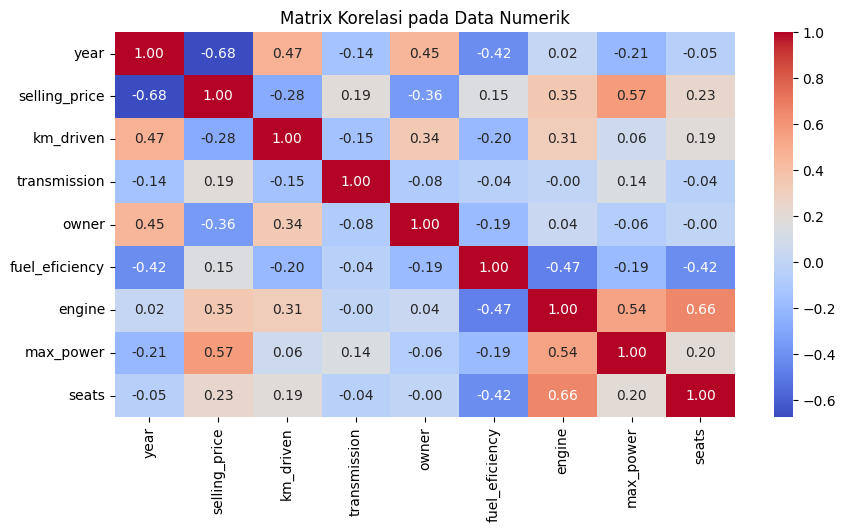

In [1139]:
numeric_features = updated_data.select_dtypes(include=['number'])
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrix Korelasi pada Data Numerik')
plt.show()

### Linear Regression

In [1140]:
lr = LinearRegression()
lr.fit(x_train[["year"]], y_train)

LinearRegression()

In [1141]:
mae = mean_absolute_error(y_train, lr.predict(x_train[["year"]]))
mae

25978589.16004104

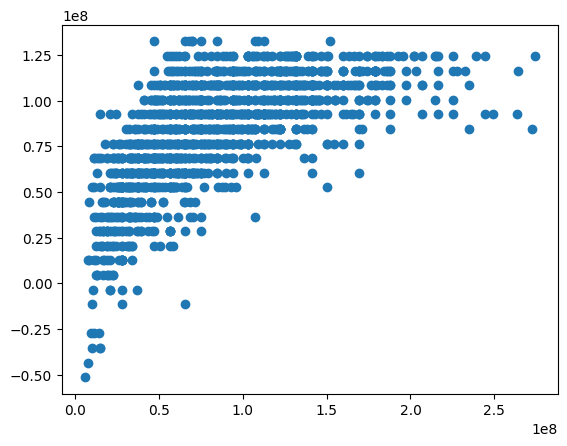

In [1142]:
plt.scatter(y_test, lr.predict(x_test[["year"]]))
plt.show()

### KNN Model


In [1143]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=9)
knn_model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=9)

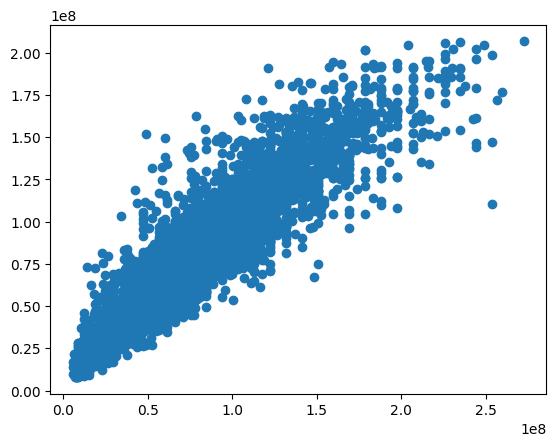

In [1144]:
plt.scatter(y_train, knn_model.predict(x_train))
plt.show()

In [1145]:
mae = mean_absolute_error(y_train, knn_model.predict(x_train))
mae

13117898.09979383

In [1146]:
mse = mean_squared_error(y_train, knn_model.predict(x_train))
mse

347174330798711.1

### Random Forest Model


In [1147]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [1148]:
mae = mean_absolute_error(y_train, rf_model.predict(x_train))
mae

4429797.257116053

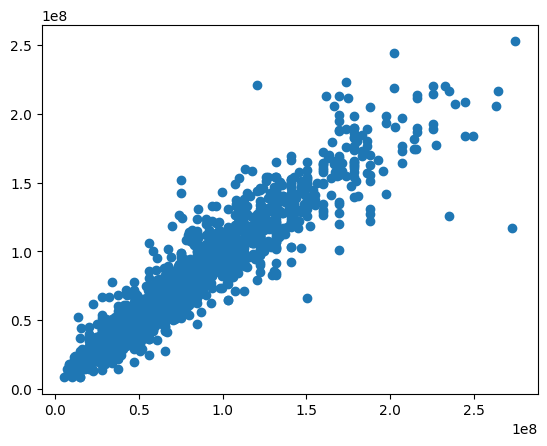

In [1149]:
plt.scatter(y_test, rf_model.predict(x_test))
plt.show()

### XGBoost Model

In [1150]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [1151]:
xgb_model.score(x_train, y_train)

0.970655773145399

In [1152]:
xgb_mae = mean_absolute_error(y_train, xgb_model.predict(x_train))
xgb_mae

5799922.013449211

### Evaluation

In [1153]:
r2 = r2_score(y_train, knn_model.predict(x_train))
print(f"R-squared (R2) for KNN model on training data: {r2}")

r2 = r2_score(y_train, rf_model.predict(x_train))
print(f"R-squared (R2) for Random Forest model on training data: {r2}")

r2 = r2_score(y_train, lr.predict(x_train[["year"]]))
print(f"R-squared (R2) for Linear Regression model on training data: {r2}")

R-squared (R2) for KNN model on training data: 0.8397334345826319
R-squared (R2) for Random Forest model on training data: 0.9818899490401355
R-squared (R2) for Linear Regression model on training data: 0.46574411830295437


In [1154]:
from sklearn.metrics import mean_absolute_percentage_error
print('Approximation error =', np.round((100 * mean_absolute_percentage_error(y_test, rf_model.predict(x_test))), 2), '%')

Approximation error = 16.87 %


In [1155]:
importances = rf_model.feature_importances_
features = x_train.columns

features_with_importances = pd.DataFrame({'Features':features, 'Importance':importances})

features_with_importances = features_with_importances.sort_values(['Importance'], ascending = False)
features_with_importances

,Features,Importance
0,year,0.505092
6,max_power,0.275658
5,engine,0.095335
4,fuel_eficiency,0.048736
1,km_driven,0.044457
7,seats,0.013329
3,owner,0.007706
2,transmission,0.002351
8,seller_type_Dealer,0.002006
9,seller_type_Individual,0.001932


In [1156]:
mse_lr = mean_squared_error(y_test, lr.predict(x_test[["year"]]))
print(f"MSE for Linear Regression: {mse_lr}")

mse_knn = mean_squared_error(y_test, knn_model.predict(x_test))
print(f"MSE for KNN: {mse_knn}")

mse_rf = mean_squared_error(y_test, rf_model.predict(x_test))
print(f"MSE for Random Forest: {mse_rf}")

MSE for Linear Regression: 1308408753594358.8
MSE for KNN: 484886391924523.0
MSE for Random Forest: 277837703088063.34


In [1157]:
rmse_lr = np.sqrt(mse_lr)
print(f"RMSE for Linear Regression: {rmse_lr}")

rmse_knn = np.sqrt(mse_knn)
print(f"RMSE for KNN: {rmse_knn}")

rmse_rf = np.sqrt(mse_rf)
print(f"RMSE for Random Forest: {rmse_rf}")

RMSE for Linear Regression: 36171933.22998314
RMSE for KNN: 22020136.055994816
RMSE for Random Forest: 16668464.329027535


#### Try model with no outlier data

In [1158]:
Q1 = updated_data["selling_price"].quantile(0.25)
Q3 = updated_data["selling_price"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_data = updated_data[(updated_data["selling_price"] >= lower_bound) & (updated_data["selling_price"] <= upper_bound)]
cleaned_data

,year,selling_price,km_driven,transmission,owner,fuel_eficiency,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,10,84609000.0,145500,0,0,23.40,1248.0,74.00,5.0,False,True,False,False,True,False,False
1,10,69567400.0,120000,0,2,21.14,1498.0,103.52,5.0,False,True,False,False,True,False,False
2,18,29707160.0,140000,0,4,17.70,1497.0,78.00,5.0,False,True,False,False,False,False,True
3,14,42304500.0,127000,0,0,23.00,1396.0,90.00,5.0,False,True,False,False,True,False,False
4,17,24442600.0,120000,0,0,16.10,1298.0,88.20,5.0,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,11,48885200.0,50000,0,2,18.90,998.0,67.10,5.0,False,True,False,False,False,False,True
8122,10,89309500.0,80000,0,2,22.54,1396.0,88.73,5.0,False,True,False,False,True,False,False
8123,11,60166400.0,110000,0,0,18.50,1197.0,82.85,5.0,False,True,False,False,False,False,True
8124,17,25382700.0,119000,0,1,16.80,1493.0,110.00,5.0,False,True,False,False,True,False,False


In [1159]:
feats = updated_data.drop(columns=["selling_price"])
lab = updated_data["selling_price"]
feats

,year,km_driven,transmission,owner,fuel_eficiency,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,10,145500,0,0,23.40,1248.0,74.00,5.0,False,True,False,False,True,False,False
1,10,120000,0,2,21.14,1498.0,103.52,5.0,False,True,False,False,True,False,False
2,18,140000,0,4,17.70,1497.0,78.00,5.0,False,True,False,False,False,False,True
3,14,127000,0,0,23.00,1396.0,90.00,5.0,False,True,False,False,True,False,False
4,17,120000,0,0,16.10,1298.0,88.20,5.0,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,11,50000,0,2,18.90,998.0,67.10,5.0,False,True,False,False,False,False,True
8122,10,80000,0,2,22.54,1396.0,88.73,5.0,False,True,False,False,True,False,False
8123,11,110000,0,0,18.50,1197.0,82.85,5.0,False,True,False,False,False,False,True
8124,17,119000,0,1,16.80,1493.0,110.00,5.0,False,True,False,False,True,False,False


In [1160]:
scaled = m_scaler.fit_transform(feats)
scaled

array([[0.23076923, 0.79075973, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.23076923, 0.65217202, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.53846154, 0.76086827, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.26923077, 0.5978239 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.64673721, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42307692, 0.65217202, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [1161]:
scaled_df2 = pd.DataFrame(scaled, columns=feats.columns)
scaled_df2

,year,km_driven,transmission,owner,fuel_eficiency,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol
0,0.230769,0.790760,0.0,0.00,0.562337,0.267581,0.402737,0.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.230769,0.652172,0.0,0.50,0.463819,0.374786,0.691300,0.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.538462,0.760868,0.0,1.00,0.313862,0.374357,0.441838,0.1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.384615,0.690216,0.0,0.00,0.544900,0.331046,0.559140,0.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.500000,0.652172,0.0,0.00,0.244115,0.289022,0.541544,0.1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5902,0.269231,0.271735,0.0,0.50,0.366173,0.160377,0.335288,0.1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5903,0.230769,0.434780,0.0,0.50,0.524847,0.331046,0.546725,0.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5904,0.269231,0.597824,0.0,0.00,0.348736,0.245712,0.489247,0.1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5905,0.500000,0.646737,0.0,0.25,0.274629,0.372642,0.754643,0.1,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [1162]:
xt_train, xt_test, yt_train, yt_test = train_test_split(scaled_df2, lab, test_size=0.2, random_state=42)


In [1163]:
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model2.fit(xt_train, yt_train)


RandomForestRegressor(random_state=42)

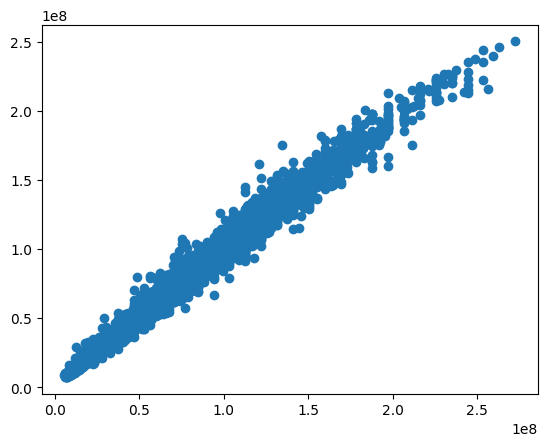

In [1164]:
plt.scatter(yt_train, rf_model2.predict(xt_train))
plt.show()

In [1165]:
model_results = {
    "model": ["Random Forest", "Random Forest2"],
    "mse": [mse_rf, mean_squared_error(yt_train, rf_model2.predict(xt_train))],
    "mae": [mae, mean_absolute_error(yt_train, rf_model2.predict(xt_train))],
}

df = pd.DataFrame(model_results)
df

,model,mse,mae
0,Random Forest,2.778377e+14,4.429797e+06
1,Random Forest2,3.914466e+13,4.406310e+06


### Hypertuning Model

In [1166]:
grid_params = {"n_estimators" : [50,60,70,80,90,100], "max_depth" : [4,8,16,32,64], "random_state" : [42, 99]}
grid = GridSearchCV(RandomForestRegressor(), grid_params, cv=5, verbose=2, scoring="neg_mean_absolute_error")
grid.fit(x_train, y_train)
print(grid.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ......max_depth=4, n_estimators=50, random_state=42; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=50, random_state=42; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=50, random_state=42; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=50, random_state=42; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=50, random_state=42; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=50, random_state=99; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=50, random_state=99; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=50, random_state=99; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=50, random_state=99; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=50, random_state=99; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=60, random_state=42; total time=   0.3s
[CV] END ......max_depth=4, n_estimators=60, ra

In [1169]:
rf_model_tuned = RandomForestRegressor(n_estimators=90, random_state=42, max_depth=16)
rf_model_tuned.fit(x_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=90, random_state=42)

In [1170]:
rf_model_tuned_mae = mean_absolute_error(y_train, rf_model_tuned.predict(x_train))
rf_model_tuned_mse = mean_squared_error(y_train, rf_model_tuned.predict(x_train))
rf_model_tuned_mae_test = mean_absolute_error(y_test, rf_model_tuned.predict(x_test))
rf_model_tuned_mse_test = mean_squared_error(y_test, rf_model_tuned.predict(x_test))

datas = {
    "model": ["Random Forest", "Random Forest Tuned"],
    "mae_train": [mean_absolute_error(y_train, rf_model.predict(x_train)), rf_model_tuned_mae],
    "mae_test": [mean_absolute_error(y_test, rf_model.predict(x_test)), rf_model_tuned_mae_test],
}

df = pd.DataFrame(datas)
df = df.round(2)
df

,model,mae_train,mae_test
0,Random Forest,4429797.26,11587408.84
1,Random Forest Tuned,4857562.98,11601735.52
